# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('D:/DATAS/Python/data/Модуль 11/yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

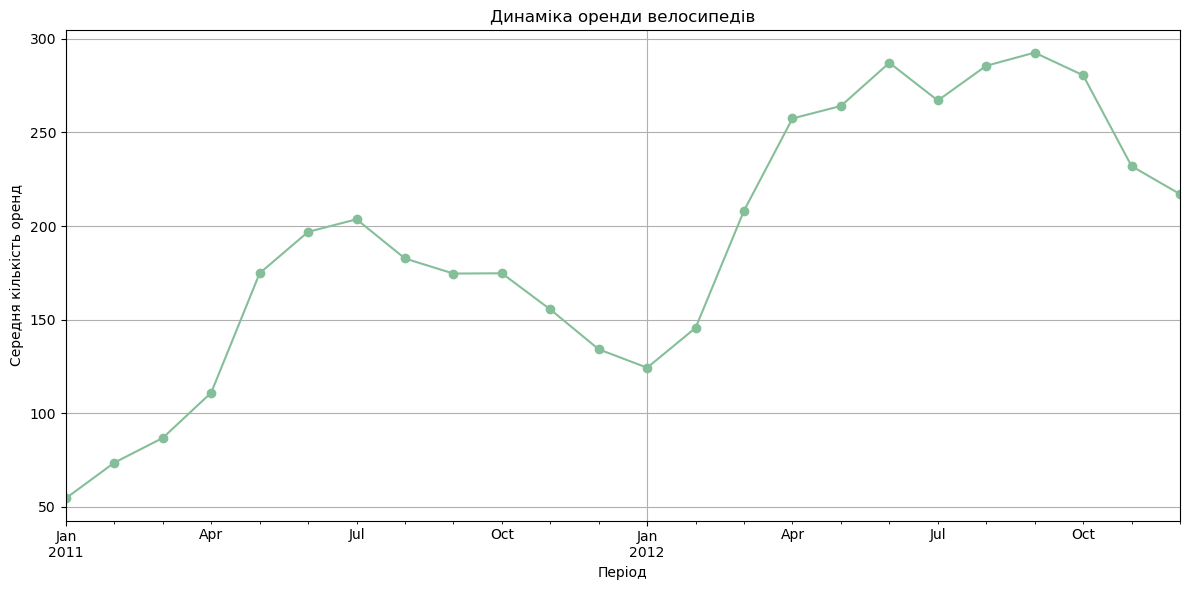

In [23]:
monthly_counts = df['count'].resample('ME').mean()
monthly_counts.plot(
    marker='o',
    color='#84BF99',
    figsize=(12, 6), 
    title='Динаміка оренди велосипедів',
    xlabel='Період',
    ylabel='Середня кількість оренд',
    grid=True
    )

plt.tight_layout()
plt.show()

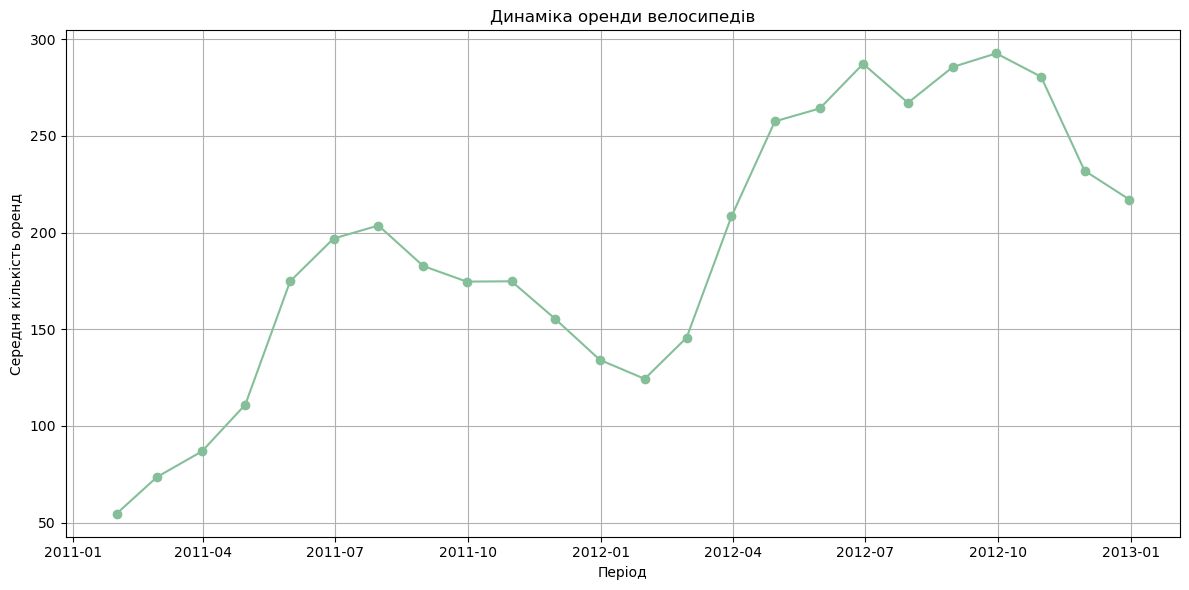

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, color='#84BF99', marker='o')
plt.title('Динаміка оренди велосипедів')
plt.xlabel('Період')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

**Висновок:** Обидва графіки подібні між собою, відрізняються маркуванням часових періодів по осі Х, видом сітки по замовчуванню (але це можна також доналаштувати, зоркема ввести plt.grid(axis='y')), в графіку побудованому за допомогою Matplotlib маркерна лінія починається не з самого початку.

Мені більше подобається графік побудований методом DataFrame.plot() - він одразу більш візуально естетичний та зрозумілий (маркування дат по осі Х). Але також подобається, що використовуючи Matplotlib можна доповнювати, доточувати, деталізувати графіки побудовані за допомогою бібліотеки Pandas (DataFrame.plot()). Загалом, після виконання ДЗ №1 і №2 ці методи побудови графіків для мене працюють як взаємодоповнюючі інструменти.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень продажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [30]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

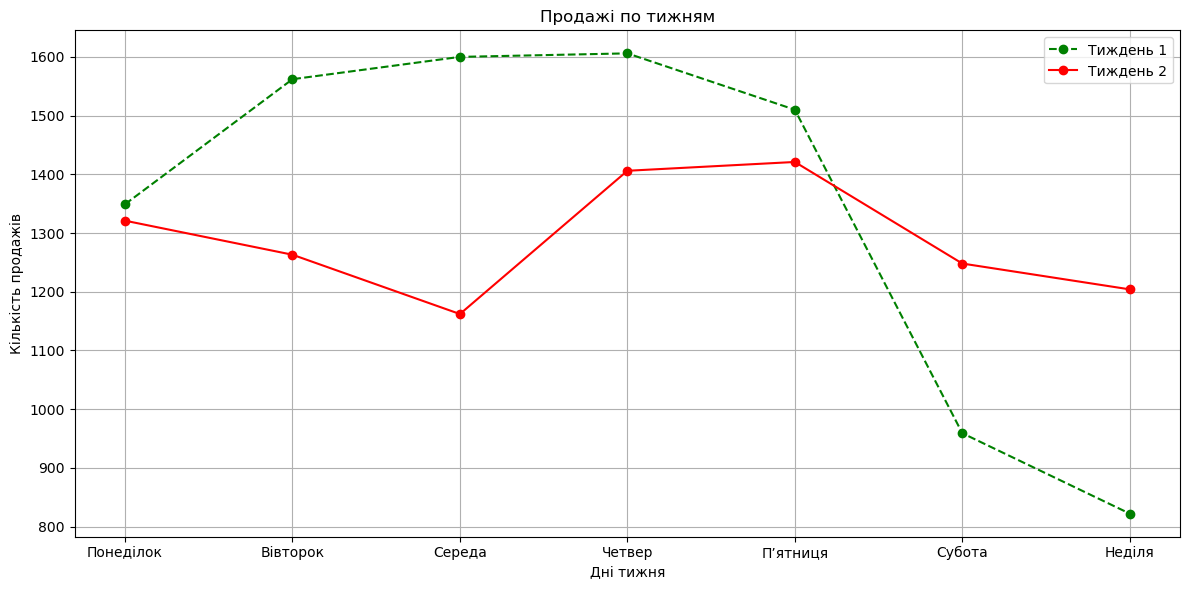

In [34]:
day_labels = ['Понеділок','Вівторок','Середа','Четвер','Пʼятниця','Субота','Неділя']

plt.figure(figsize=(12, 6))
plt.plot(days, sales_week1, 'o--', color='green', label='Тиждень 1')
plt.plot(days, sales_week2, 'o-', color='red', label='Тиждень 2')
plt.title('Продажі по тижням')
plt.xlabel('Дні тижня')
plt.ylabel('Кількість продажів')
plt.xticks(days, day_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
df = pd.DataFrame({
    'day': days * 2,
    'sales': sales_week1 + sales_week2,
    'week': ['week1']*7 + ['week2']*7
})
stats = df.groupby('week')['sales'].std()
stats

week
week1    324.035492
week2     98.189806
Name: sales, dtype: float64

**Висновок:**

1. Згідно графіка - стабільніші продажі були в другому тижні.

2. Найшвидше це можна відслідкувати, якщо порахувати стандартне відхилення - чим його значення менше, тим менше коливаються дані відносно середнього значення. Підрахунки вище також свідчать, що 2 тиждень продажів був стабільніший - **std = 98,2**.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

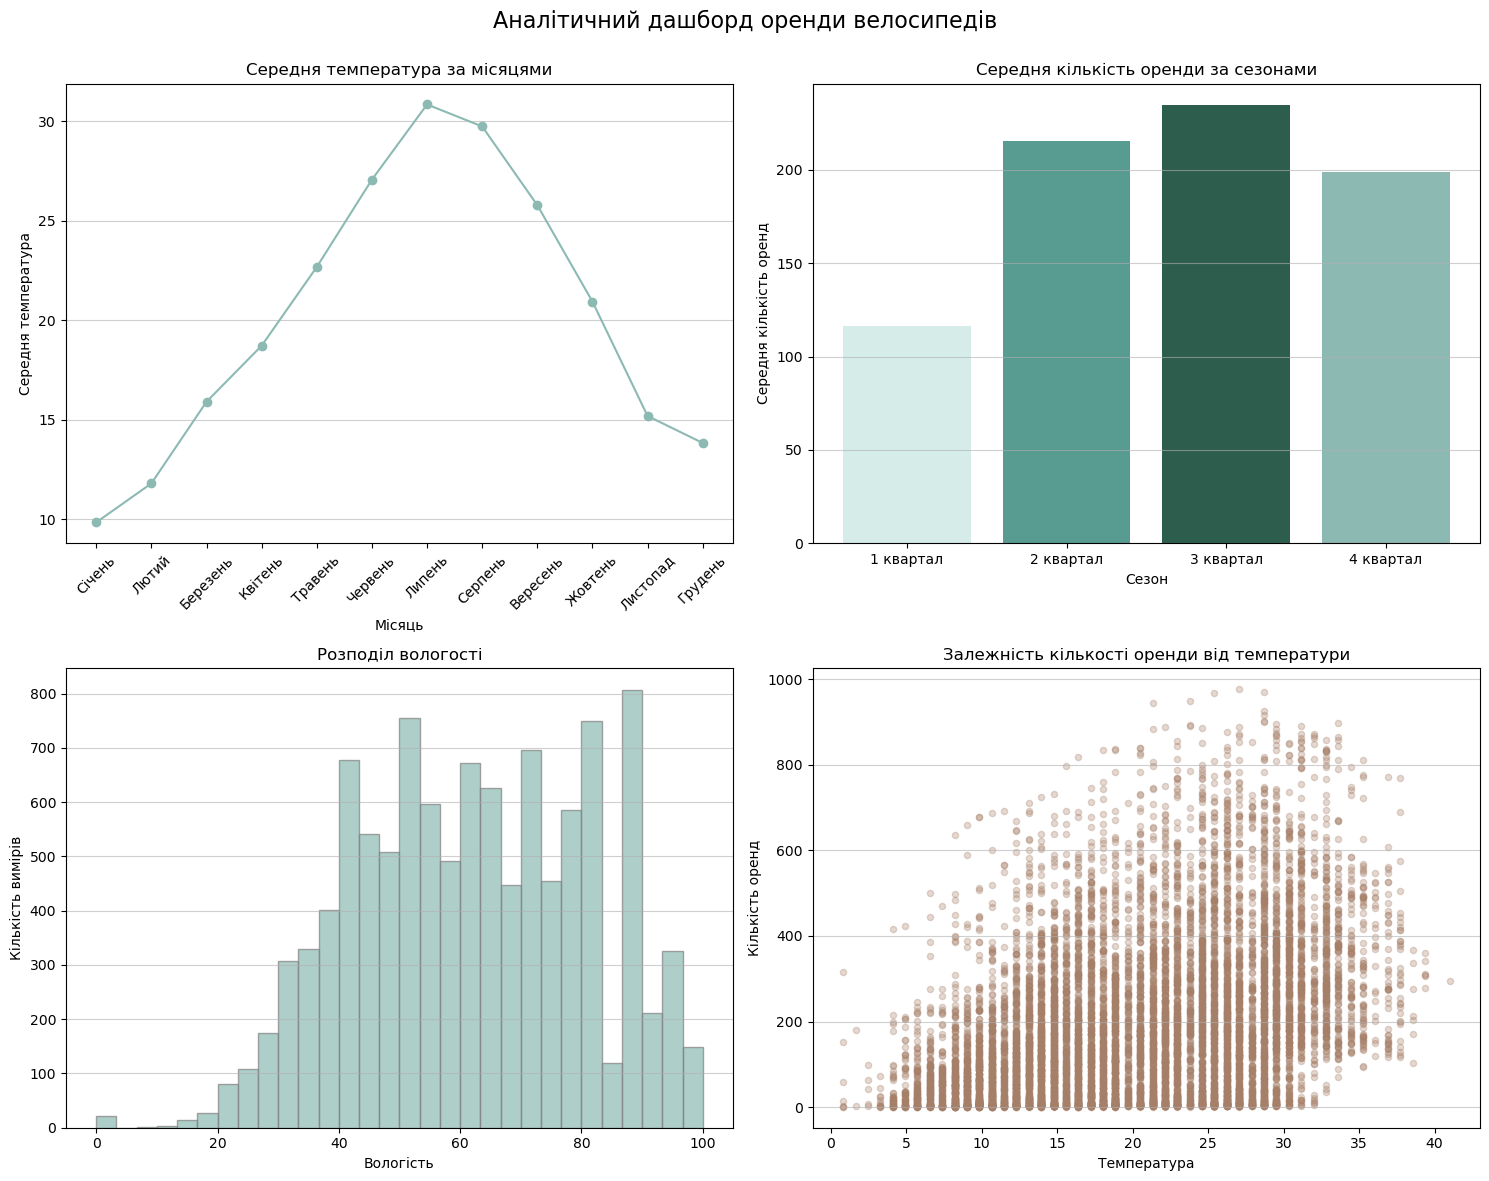

In [211]:
season_map = {1: '1 квартал', 2: '2 квартал', 3: '3 квартал', 4: '4 квартал'}
month_map = {1: 'Січень', 2: 'Лютий', 3: 'Березень', 4: 'Квітень', 5: 'Травень', 6: 'Червень', 
             7: 'Липень', 8: 'Серпень', 9: 'Вересень', 10: 'Жовтень', 11: 'Листопад', 12: 'Грудень'}

seasonal_count = df.groupby('season')['count'].mean()
seasonal_count.index = seasonal_count.index.map(season_map)

monthly_temp = df.groupby('month')['temp'].mean()
monthly_temp.index = monthly_temp.index.map(month_map)


plt.figure(figsize=(15, 12))

# Графік 1
plt.subplot(2, 2, 1) 
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', color='#8CBAB3', linestyle='-')
plt.title('Середня температура за місяцями')
plt.xlabel('Місяць')
plt.xticks(rotation=45)
plt.ylabel('Середня температура')
plt.grid(axis='y', alpha=0.6)

# Графік 2
plt.subplot(2, 2, 2)
plt.bar(seasonal_count.index, seasonal_count.values, color=['#D6ECE9', '#589B90', '#2D5E4D', '#8CBAB3'])
plt.title('Середня кількість оренди за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')
plt.grid(axis='y', alpha=0.6)

# Графік 3
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=30, color='#8CBAB3', edgecolor='grey', alpha=0.7)
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('Кількість вимірів')
plt.grid(axis='y', alpha=0.6)

# Графік 4 
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], color='#A67F68', alpha=0.3, s=20)
plt.title('Залежність кількості оренди від температури')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.grid(axis='y', alpha=0.6)

plt.suptitle('Аналітичний дашборд оренди велосипедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

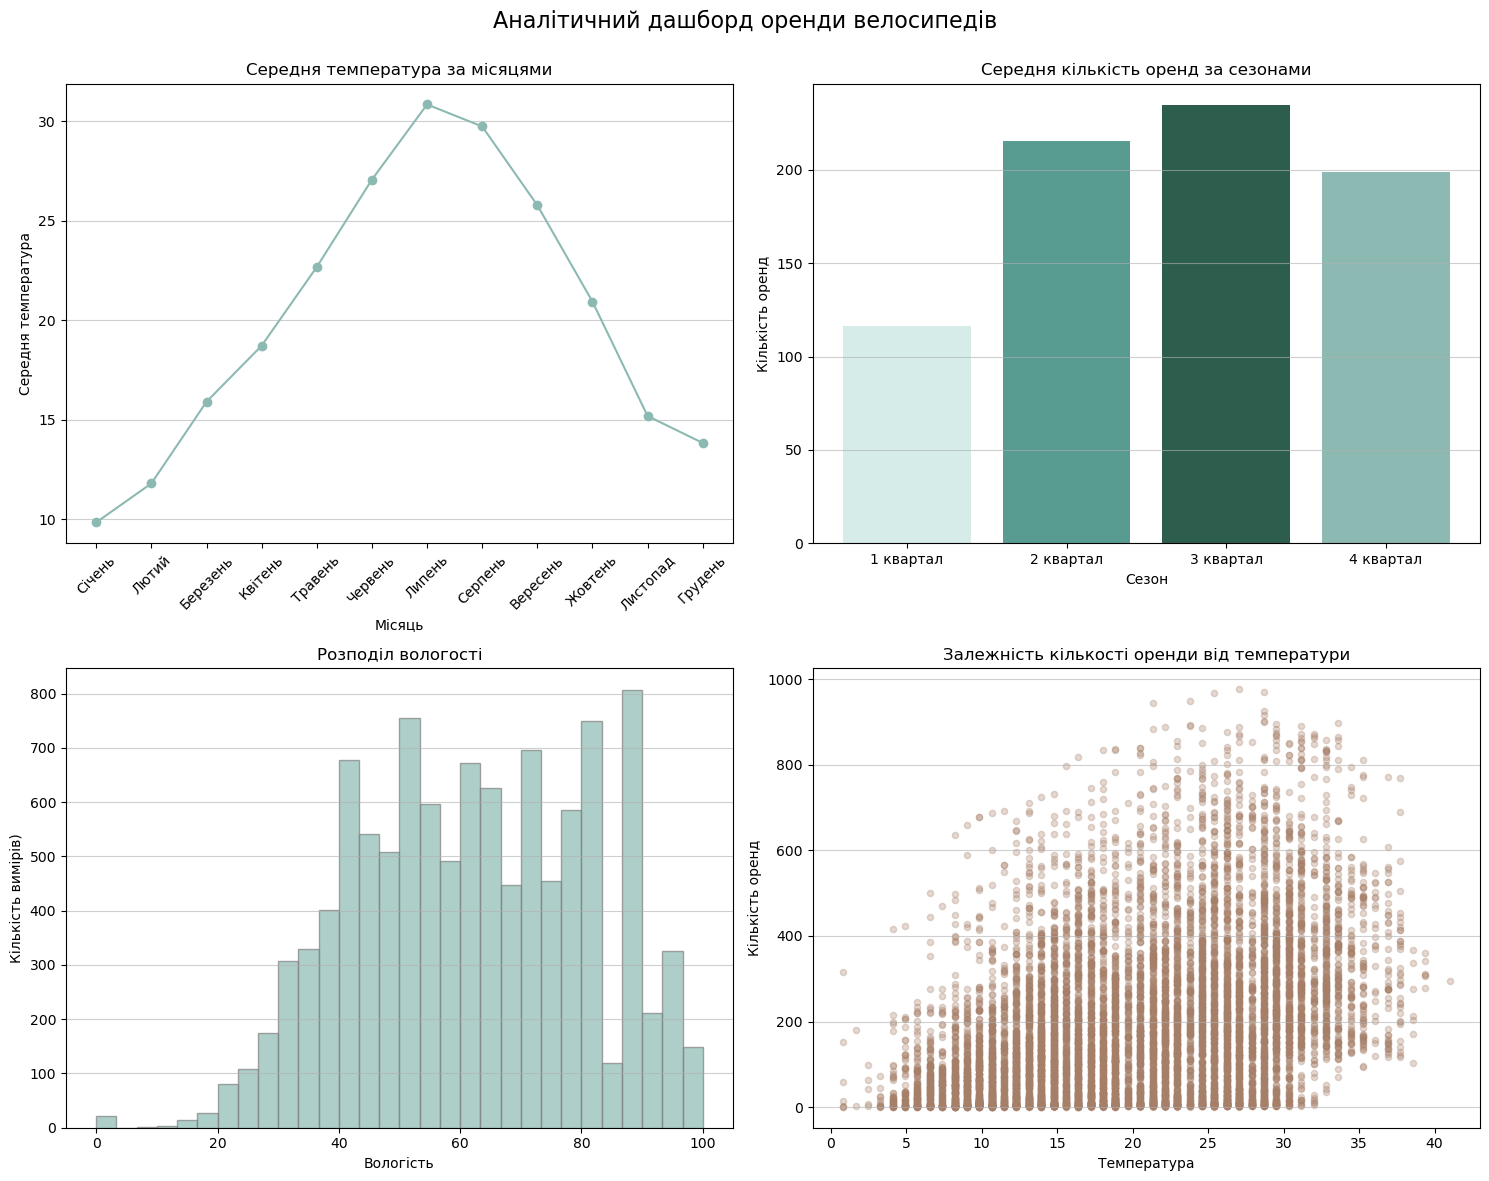

In [212]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Графік 1
ax[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='#8CBAB3', linestyle='-')
ax[0, 0].set_title('Середня температура за місяцями')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Середня температура')
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].grid(axis='y', alpha=0.6)

# Графік 2
ax[0, 1].bar(seasonal_count.index, seasonal_count.values, color=['#D6ECE9', '#589B90', '#2D5E4D', '#8CBAB3'])
ax[0, 1].set_title('Середня кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Кількість оренд')
ax[0, 1].set_xticks(seasonal_count.index)
ax[0, 1].set_xticklabels(['1 квартал','2 квартал','3 квартал','4 квартал'])
ax[0, 1].grid(axis='y', alpha=0.6)


# Графік 3
ax[1, 0].hist(df['humidity'], bins=30, color='#8CBAB3', edgecolor='grey', alpha=0.7)
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Кількість вимірів)')
ax[1, 0].grid(axis='y', alpha=0.6)

# Графік 4
ax[1, 1].scatter(df['temp'], df['count'], color='#A67F68', alpha=0.3, s=20)
ax[1, 1].set_title('Залежність кількості оренди від температури')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')
ax[1, 1].grid(axis='y', alpha=0.6)

plt.suptitle('Аналітичний дашборд оренди велосипедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Відповідь:** Підхід побудови кількох графіків на одній фігурі з plt.subplots() забезпечує легший доступ до певного графіка на конкретній осі і має більш зрозумілий код порівняно з методом побудови plt.subplot().

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [122]:
monthly_max = df['count'].resample('ME').max()
monthly_min = df['count'].resample('ME').min()

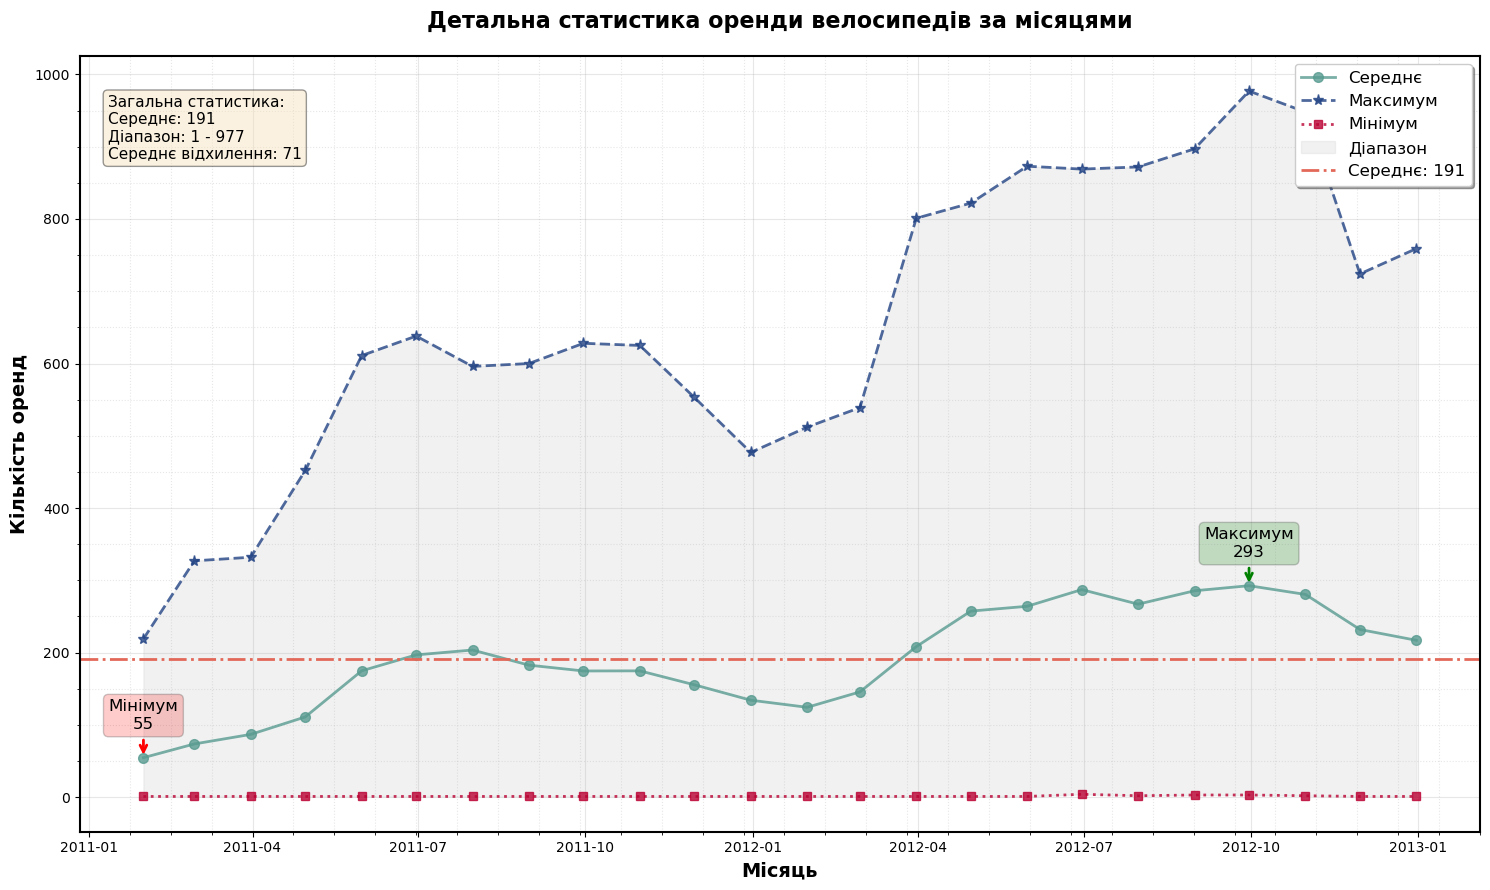

In [215]:
fig, ax = plt.subplots(figsize=(15, 9))

# Лінії графіка з різними налаштуваннями
ax.plot(monthly_counts.index, monthly_counts.values, color='#589B90', marker='o', linewidth=2,
        label='Середнє', markersize=7, alpha=0.8)
ax.plot(monthly_max.index, monthly_max.values, color='#234485', linestyle='--', marker='*', linewidth=2,
        label='Максимум', markersize=8, alpha=0.8)
ax.plot(monthly_min.index, monthly_min.values, color='#BA0233', linestyle=':', marker='s', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.8)

# Заповнення фігури між min та max значеннями
ax.fill_between(monthly_counts.index, monthly_min.values, monthly_max.values,
                alpha=0.3, color='lightgray', label='Діапазон')

# Дві анотації
max_idx = monthly_counts.idxmax()
max_val = monthly_counts.max()
ax.annotate(f'Максимум\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 40),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.2))

min_idx = monthly_counts.idxmin()
min_val = monthly_counts.min()
ax.annotate(f'Мінімум\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 40),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.2))


# Осі та назва графіка
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренди велосипедів за місяцями',
             fontsize=16, fontweight='bold', pad=20)

# Сітки: основна та допоміжна
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.3)
ax.minorticks_on()

# Середня лінія за весь період
overall_mean = monthly_counts.mean()
ax.axhline(y=overall_mean, color='#E26858', linestyle='-.', linewidth=2,
           label=f'Середнє: {overall_mean:.0f}')

# Легенда
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
          fancybox=True)

# Текстовий блок
textstr = (
    f'Загальна статистика:\n'
    f'Середнє: {monthly_counts.mean():.0f}\n'
    f'Діапазон: {monthly_min.min():.0f} - {monthly_max.max():.0f}\n'
    f'Середнє відхилення: {monthly_counts.std():.0f}'
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Рамка
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

**Відповідь:**
1. Анотації візуально допомагають звертати увагу на важливу інформації по певним точкам на графіку.

2. fill_between() - робить заливку важливої області, яку необхідно виділити на графіку (діапазон значень від min до max, сезон свят).

3. Текстовий блок з данними підвищує читабельність, виводить додаткову важливу інформацію на графік, її видно одразу і не треба шукати розрахунки самостійно.